In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/.../hotels_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/.../hotels_test.csv")

In [3]:
df_train.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [4]:
df_test.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,82,2017,March,12,21,1,5,3,0,...,0,E,E,0,No Deposit,0,Transient,151.30,0,2
1,City Hotel,51,2017,March,12,21,4,10,2,2,...,0,F,F,0,No Deposit,0,Transient,202.71,0,0
2,City Hotel,0,2017,March,12,22,0,1,2,0,...,0,A,A,0,No Deposit,0,Transient,12.00,0,0
3,City Hotel,59,2017,March,12,22,0,1,2,0,...,0,A,A,0,No Deposit,0,Transient,60.98,0,0
4,City Hotel,6,2017,March,12,22,0,1,2,0,...,0,A,C,0,No Deposit,0,Transient,94.40,0,0


In [5]:
print(len(df_train.columns))

27


# Dealing with non numerical inputs

In [6]:
print(df_train.arrival_date_month.unique())

month_dict = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5, 
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [7]:
df_train["arrival_date_month_numerical"] = df_train.arrival_date_month.apply(lambda x: month_dict[x])

print(len(df_train.columns)); print(df_train.arrival_date_month_numerical)

28
0         7
1         7
2         7
3         7
4         7
         ..
59995    11
59996    11
59997    11
59998    11
59999    11
Name: arrival_date_month_numerical, Length: 60000, dtype: int64


In [8]:
df_train = df_train.drop("arrival_date_month", axis=1)
print(len(df_train.columns)); df_train.head(5)

27


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_numerical
0,Resort Hotel,0,342,2015,27,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,7
1,Resort Hotel,0,737,2015,27,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,7
2,Resort Hotel,0,7,2015,27,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,7
3,Resort Hotel,0,13,2015,27,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,7
4,Resort Hotel,0,14,2015,27,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,7


In [9]:
df_train.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [10]:
df_train.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [11]:
room_type_dict = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5, 
    "F": 6,
    "G": 7,
    "H": 8,
    "I": 9,
    "K": 11,
    "L": 12,
    "P": 15,
}



In [12]:
df_train["reserved_room_type_numerical"] = df_train.reserved_room_type.apply(lambda x: room_type_dict[x])
df_train["assigned_room_type_numerical"] = df_train.assigned_room_type.apply(lambda x: room_type_dict[x])
print(len(df_train.columns)); print(df_train.reserved_room_type_numerical)

29
0        3
1        3
2        1
3        1
4        1
        ..
59995    1
59996    1
59997    1
59998    5
59999    1
Name: reserved_room_type_numerical, Length: 60000, dtype: int64


In [13]:
df_train.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [14]:
deposit_type_dict = {
    "No Deposit": 0,
    "Refundable": 1,
    "Non Refund": -1,
}

In [15]:
df_train["deposit_type_numerical"] = df_train.deposit_type.apply(lambda x: deposit_type_dict[x])
print(len(df_train.columns)); print(df_train.deposit_type_numerical)

30
0        0
1        0
2        0
3        0
4        0
        ..
59995   -1
59996   -1
59997    0
59998    0
59999    0
Name: deposit_type_numerical, Length: 60000, dtype: int64


In [16]:
df_train.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [17]:
customer_type_dict = {
    "Transient": 0,
    "Contract": 1,
    "Transient-Party": 2,
    "Group":3
}

In [18]:
df_train["customer_type_numerical"] = df_train.customer_type.apply(lambda x: customer_type_dict[x])
print(len(df_train.columns)); print(df_train.customer_type_numerical)

31
0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: customer_type_numerical, Length: 60000, dtype: int64


In [19]:
for column, series in df_train.items():
    #print(type(series[0]))
    if str(type(series[0])) == "<class 'str'>":
        print(column)
    

hotel
meal
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type


In [20]:
print(df_train.hotel.unique())

hotel_dict = {
    "Resort Hotel": 0,
    "City Hotel": 1,
}

['Resort Hotel' 'City Hotel']


In [21]:
df_train["hotel_numerical"] = df_train.hotel.apply(lambda x: hotel_dict[x])
print(len(df_train.columns)); print(df_train.hotel_numerical)

32
0        0
1        0
2        0
3        0
4        0
        ..
59995    1
59996    1
59997    1
59998    1
59999    1
Name: hotel_numerical, Length: 60000, dtype: int64


In [22]:
df_train.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [23]:
meal_dict = {
    "BB": 0,
    "FB": 1,
    "HB": 2,
    "SC": 3,
    "Undefined": -1
}

In [24]:
df_train["meal_numerical"] = df_train.meal.apply(lambda x: meal_dict[x])
print(len(df_train.columns)); print(df_train.meal_numerical)

33
0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    2
59998    0
59999    3
Name: meal_numerical, Length: 60000, dtype: int64


In [25]:
df_train.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [26]:
market_segment_dict = {
    "Direct": 0,
    "Corporate": 1,
    "Online TA": 2,
    "Offline TA/TO": 3,
    "Complementary": 4,
    "Groups": 5,
    "Aviation": 6,
    "GDS": 7,
    "TA/TO": 8,
    "Undefined": -1
}

In [27]:
df_train["market_segment_numerical"] = df_train.market_segment.apply(lambda x: market_segment_dict[x])
df_train["distribution_channel_numerical"] = df_train.distribution_channel.apply(lambda x: market_segment_dict[x])

print(len(df_train.columns)); print(df_train.market_segment_numerical)

35
0        0
1        0
2        0
3        1
4        2
        ..
59995    3
59996    3
59997    2
59998    0
59999    2
Name: market_segment_numerical, Length: 60000, dtype: int64


In [28]:
df_train.distribution_channel.unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [29]:
df_train = df_train.drop(["deposit_type", "customer_type", "reserved_room_type", "assigned_room_type", "distribution_channel", "market_segment", "meal"], axis=1)

In [30]:
df_train.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,meal_numerical,market_segment_numerical,distribution_channel_numerical
0,Resort Hotel,0,342,2015,27,1,0,0,2,0,...,0,7,3,3,0,0,0,0,0,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0,...,0,7,3,3,0,0,0,0,0,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0,...,0,7,1,3,0,0,0,0,0,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0,...,0,7,1,1,0,0,0,0,1,1
4,Resort Hotel,0,14,2015,27,1,0,2,2,0,...,1,7,1,1,0,0,0,0,2,8


In [31]:
for column, series in df_train.items():
    #print(type(series[0]))
    if str(type(series[0])) == "<class 'str'>":
        print(column)

hotel


In [32]:
df_train = df_train.drop("hotel", 1)

In [33]:
df_train.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,meal_numerical,market_segment_numerical,distribution_channel_numerical
0,0,342,2015,27,1,0,0,2,0,0,...,0,7,3,3,0,0,0,0,0,0
1,0,737,2015,27,1,0,0,2,0,0,...,0,7,3,3,0,0,0,0,0,0
2,0,7,2015,27,1,0,1,1,0,0,...,0,7,1,3,0,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0,0,...,0,7,1,1,0,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0,0,...,1,7,1,1,0,0,0,0,2,8


In [34]:
df_train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,meal_numerical,market_segment_numerical,distribution_channel_numerical
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.422033,102.022967,2015.975133,28.138217,15.815833,1.050200,2.837817,1.861033,0.112450,0.010467,...,0.509117,6.757167,2.229333,2.669683,-0.113433,0.499717,0.332333,0.427517,2.464350,6.385967
std,0.493888,103.028878,0.680849,13.402736,8.825619,1.089985,2.221177,0.631397,0.418817,0.110260,...,0.767502,3.057066,1.877081,2.016592,0.324553,0.850673,0.471054,0.901754,1.469693,3.142599
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000
50%,0.000000,71.000000,2016.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000
75%,1.000000,160.000000,2016.000000,39.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,1.000000,9.000000,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,3.000000,8.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,5.000000,12.000000,15.000000,15.000000,1.000000,3.000000,1.000000,3.000000,6.000000,8.000000


Column: is_canceled has:	0 NAN values
Column: lead_time has:	0 NAN values
Column: arrival_date_year has:	0 NAN values
Column: arrival_date_week_number has:	0 NAN values
Column: arrival_date_day_of_month has:	0 NAN values
Column: stays_in_weekend_nights has:	0 NAN values
Column: stays_in_week_nights has:	0 NAN values
Column: adults has:	0 NAN values
Column: children has:	0 NAN values
Column: babies has:	0 NAN values
Column: is_repeated_guest has:	0 NAN values
Column: previous_cancellations has:	0 NAN values
Column: previous_bookings_not_canceled has:	0 NAN values
Column: booking_changes has:	0 NAN values
Column: days_in_waiting_list has:	0 NAN values
Column: adr has:	0 NAN values
Column: required_car_parking_spaces has:	0 NAN values
Column: total_of_special_requests has:	0 NAN values
Column: arrival_date_month_numerical has:	0 NAN values
Column: reserved_room_type_numerical has:	0 NAN values
Column: assigned_room_type_numerical has:	0 NAN values
Column: deposit_type_numerical has:	0 NAN

C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Column: meal_numerical has:	0 NAN values
Column: market_segment_numerical has:	0 NAN values
Column: distribution_channel_numerical has:	0 NAN values


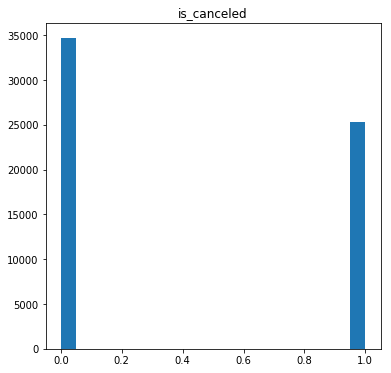

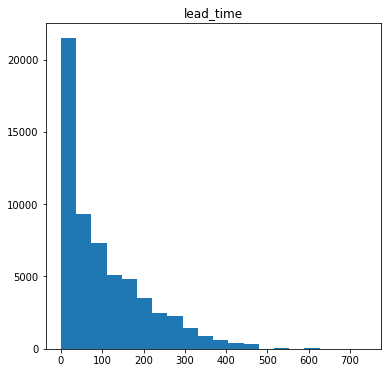

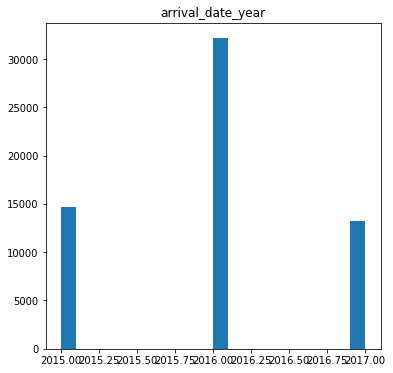

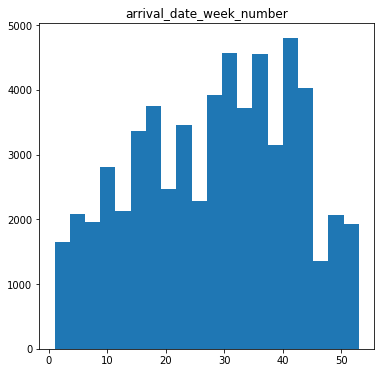

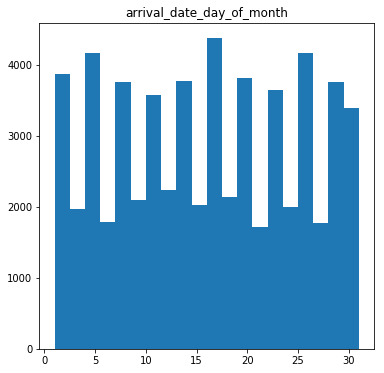

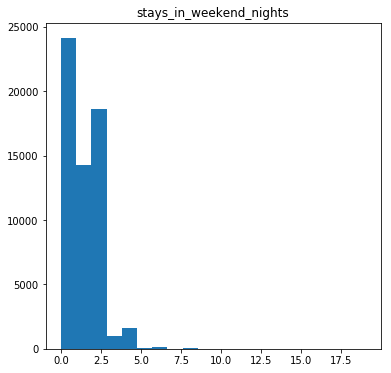

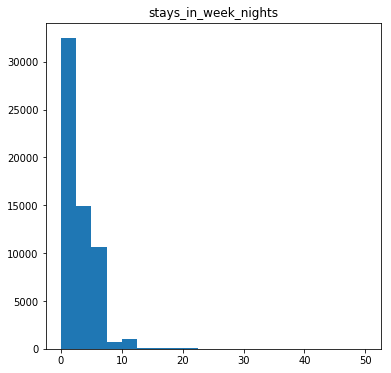

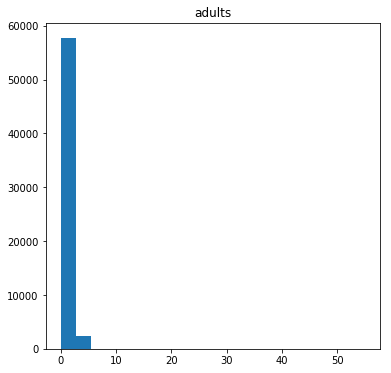

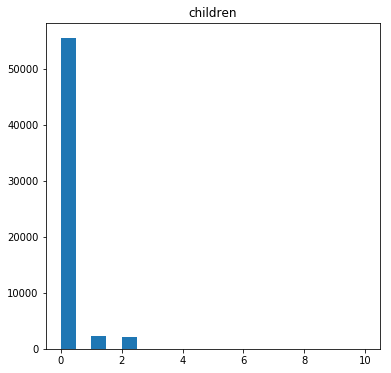

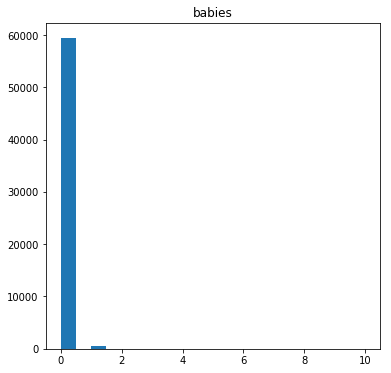

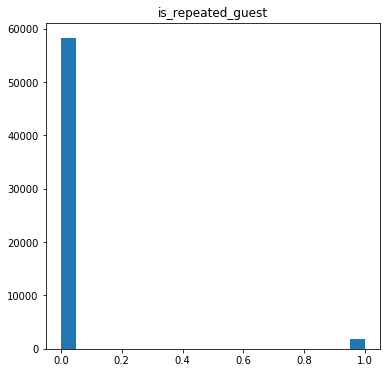

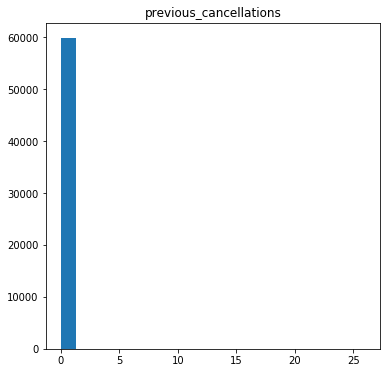

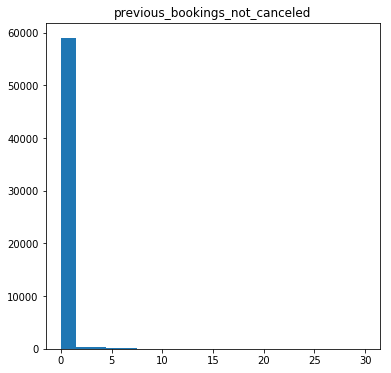

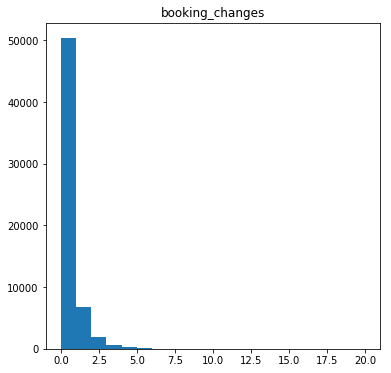

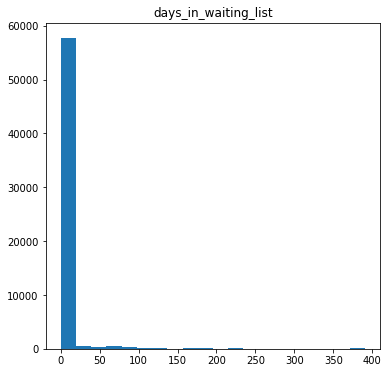

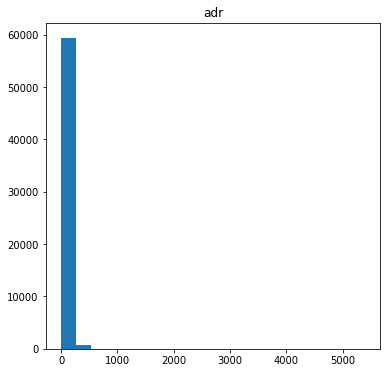

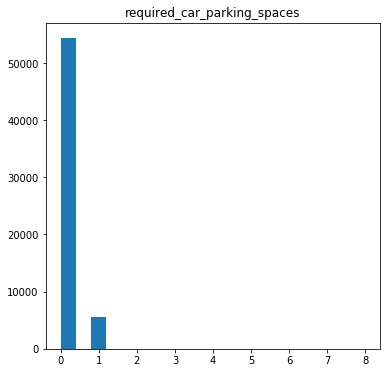

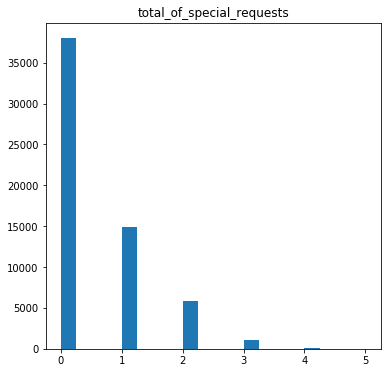

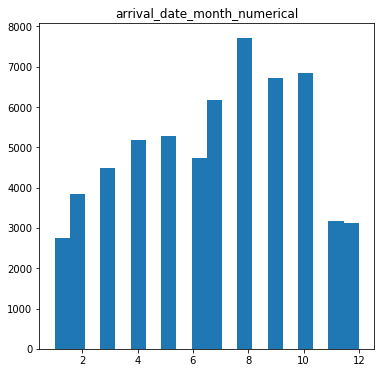

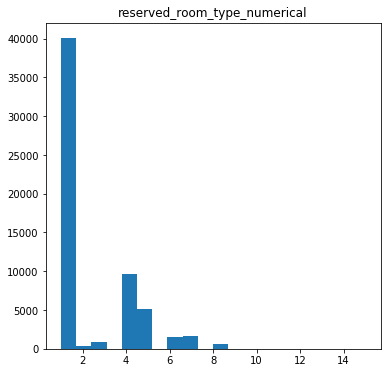

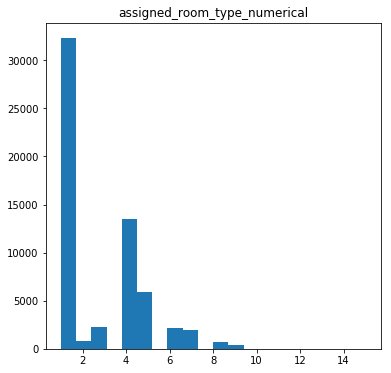

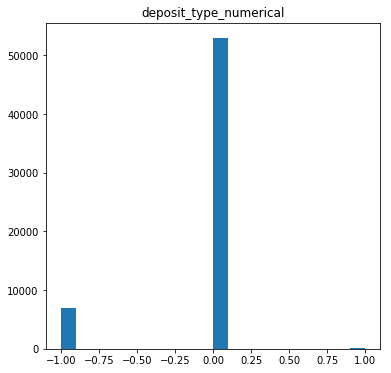

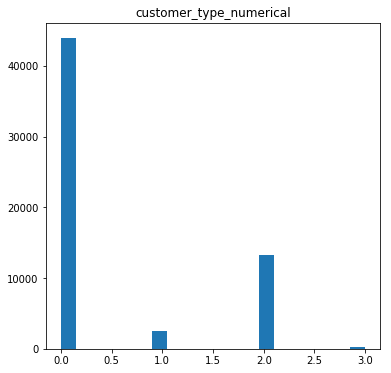

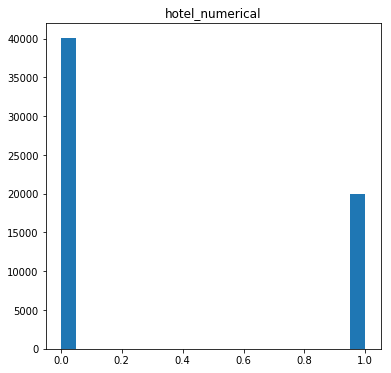

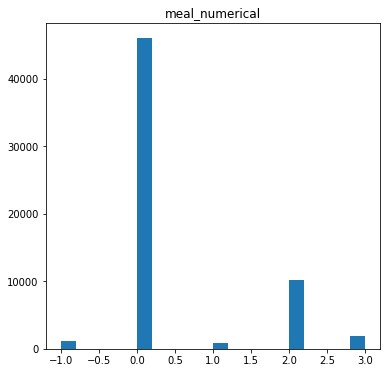

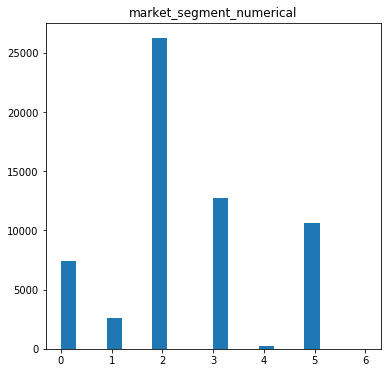

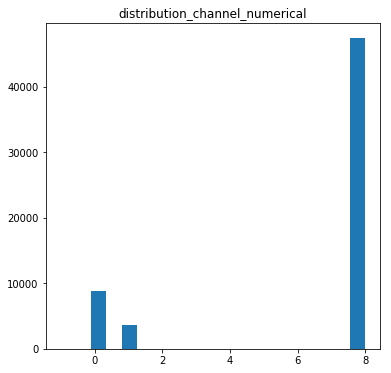

In [35]:
for column, series in df_train.items():
    print(f"Column: {column} has:\t{sum(series.isna())} NAN values")
    plt.figure(figsize=[6,6])
    plt.hist(series, bins=20)
    plt.title(column)

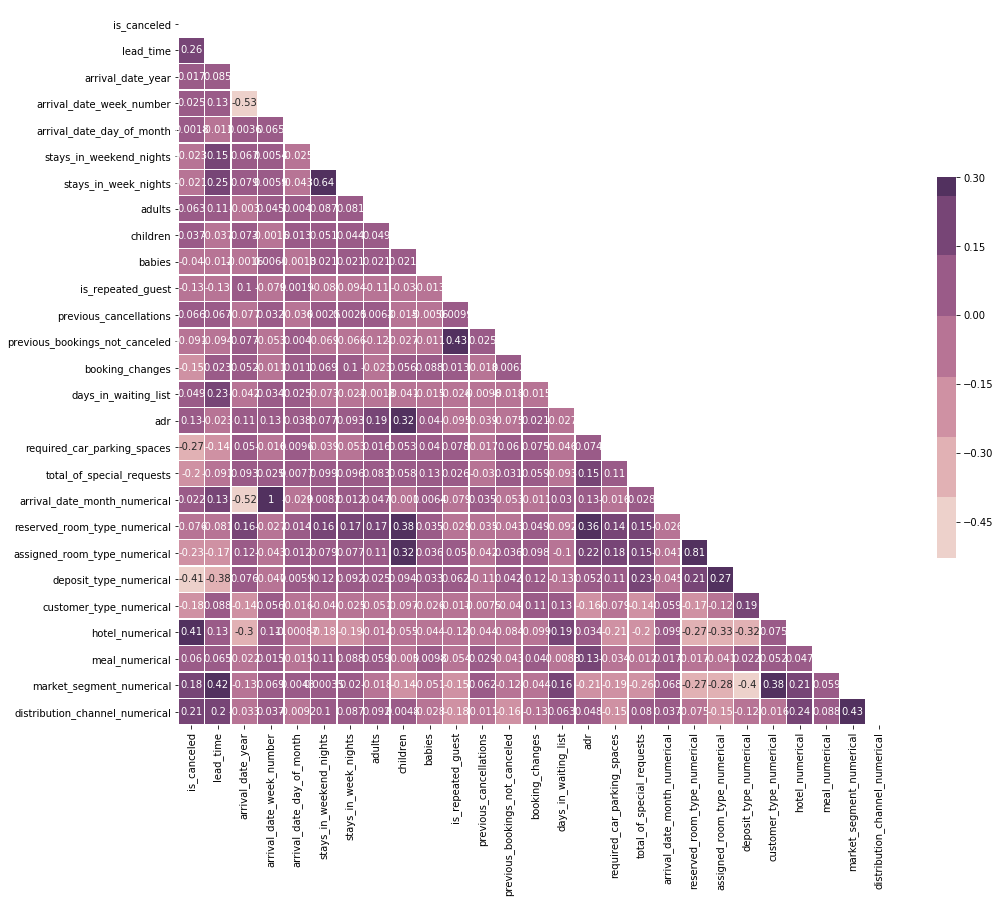

In [36]:
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.cubehelix_palette(8)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
scaler = MinMaxScaler()

X = df_train.drop("is_canceled", axis=1)
X = scaler.fit_transform(X)

y = df_train["is_canceled"]
y = to_categorical(y, num_classes=None)

print(f'Independent variables matrix size:\t{X.shape}\nDependent variable matrix size:\t{y.shape}')

Independent variables matrix size:	(60000, 26)
Dependent variable matrix size:	(60000, 2)


In [39]:
kFold = KFold(n_splits=3, shuffle=True, random_state=432)

In [40]:
def define_model(input_shape = X.shape[1]):
    model = Sequential()
    model.add(Dense(200, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer = 'Nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Searching for optimum batch size

In [ ]:
batch_size = [8, 16, 32, 64, 128]

model = KerasClassifier(build_fn=define_model, verbose=0)
param_grid = dict(batch_size=batch_size, epochs=[150])

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kFold, verbose=113, n_jobs=1)

grid_result = grid.fit(X, y)

In [41]:
callbacks = [EarlyStopping(monitor="loss", patience=40), ReduceLROnPlateau(monitor="loss", patience=25)]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  shuffle=True,test_size=0.1, random_state=420)

In [43]:
X_train.shape

(54000, 26)

In [45]:
dnn = define_model()

history = dnn.fit(X_train, y_train, validation_data=[X_test, y_test],
                  epochs=150, batch_size=32, callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/150
54000/54000 [==============================] - 5s 98us/step - loss: 0.3945 - accuracy: 0.8118 - val_loss: 0.3633 - val_accuracy: 0.8183
Epoch 2/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.3530 - accuracy: 0.8330 - val_loss: 0.3510 - val_accuracy: 0.8337
Epoch 3/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.3397 - accuracy: 0.8368 - val_loss: 0.3454 - val_accuracy: 0.8362
Epoch 4/150
54000/54000 [==============================] - 5s 93us/step - loss: 0.3346 - accuracy: 0.8411 - val_loss: 0.3448 - val_accuracy: 0.8385
Epoch 5/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.3299 - accuracy: 0.8461 - val_loss: 0.3344 - val_accuracy: 0.8460
Epoch 6/150
54000/54000 [==============================] - 5s 93us/step - loss: 0.3247 - accuracy: 0.8471 - val_loss: 0.3325 - val_accuracy: 0.8377
Epoch 7/150
54000/54000 [==============================] - 5s 9

54000/54000 [==============================] - 5s 93us/step - loss: 0.2893 - accuracy: 0.8654 - val_loss: 0.3559 - val_accuracy: 0.8538
Epoch 56/150
54000/54000 [==============================] - 5s 92us/step - loss: 0.2897 - accuracy: 0.8662 - val_loss: 0.3290 - val_accuracy: 0.8638
Epoch 57/150
54000/54000 [==============================] - 5s 93us/step - loss: 0.2958 - accuracy: 0.8662 - val_loss: 0.3219 - val_accuracy: 0.8595
Epoch 58/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.3151 - val_accuracy: 0.8613
Epoch 59/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.2998 - accuracy: 0.8624 - val_loss: 0.3269 - val_accuracy: 0.8577
Epoch 60/150
54000/54000 [==============================] - 5s 95us/step - loss: 0.2865 - accuracy: 0.8662 - val_loss: 0.3217 - val_accuracy: 0.8633
Epoch 61/150
54000/54000 [==============================] - 5s 100us/step - loss: 0.2889 - accuracy: 0.8658 - val_loss:

Epoch 110/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.2850 - accuracy: 0.8698 - val_loss: 0.3381 - val_accuracy: 0.8688
Epoch 111/150
54000/54000 [==============================] - 5s 97us/step - loss: 0.3064 - accuracy: 0.8673 - val_loss: 0.3398 - val_accuracy: 0.8667
Epoch 112/150
54000/54000 [==============================] - 5s 93us/step - loss: 0.2791 - accuracy: 0.8705 - val_loss: 0.3219 - val_accuracy: 0.8665
Epoch 113/150
54000/54000 [==============================] - 5s 93us/step - loss: 0.2834 - accuracy: 0.8659 - val_loss: 0.3236 - val_accuracy: 0.8712
Epoch 114/150
54000/54000 [==============================] - 5s 93us/step - loss: 0.2874 - accuracy: 0.8680 - val_loss: 0.3329 - val_accuracy: 0.8677
Epoch 115/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.2805 - accuracy: 0.8706 - val_loss: 0.3183 - val_accuracy: 0.8700
Epoch 116/150
54000/54000 [==============================] - 5s 94us/step - loss: 0.2795 - accuracy:

In [46]:
dnn.save("model_1_valacc_87%")

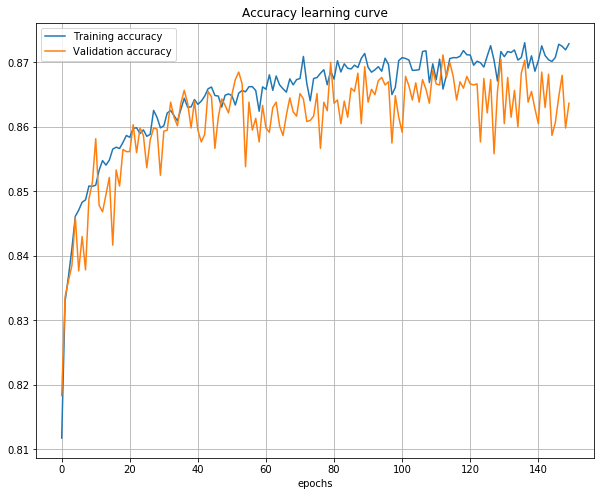

In [47]:
plt.figure(figsize=[10,8])
plt.title("Accuracy learning curve")
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel("epochs")
plt.legend()
plt.grid()

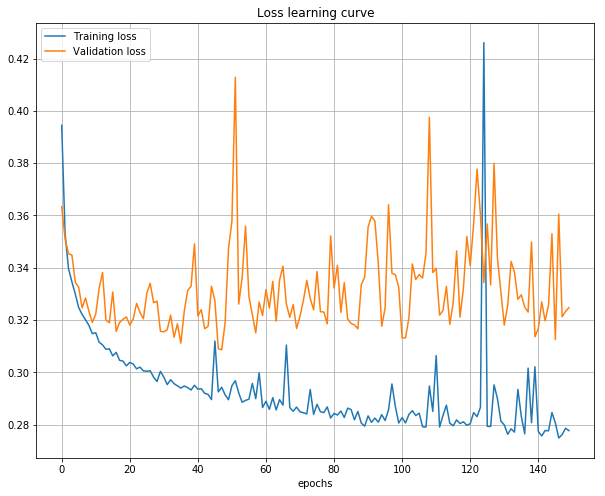

In [48]:
plt.figure(figsize=[10,8])
plt.title("Loss learning curve")
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("epochs")
plt.legend()
plt.grid()

# TEST DATA PREDICTION

In [49]:
df_test.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,82,2017,March,12,21,1,5,3,0,...,0,E,E,0,No Deposit,0,Transient,151.30,0,2
1,City Hotel,51,2017,March,12,21,4,10,2,2,...,0,F,F,0,No Deposit,0,Transient,202.71,0,0
2,City Hotel,0,2017,March,12,22,0,1,2,0,...,0,A,A,0,No Deposit,0,Transient,12.00,0,0
3,City Hotel,59,2017,March,12,22,0,1,2,0,...,0,A,A,0,No Deposit,0,Transient,60.98,0,0
4,City Hotel,6,2017,March,12,22,0,1,2,0,...,0,A,C,0,No Deposit,0,Transient,94.40,0,0


In [50]:
df_test["arrival_date_month_numerical"] = df_test.arrival_date_month.apply(lambda x: month_dict[x])
df_test["reserved_room_type_numerical"] = df_test.reserved_room_type.apply(lambda x: room_type_dict[x])
df_test["assigned_room_type_numerical"] = df_test.assigned_room_type.apply(lambda x: room_type_dict[x])
df_test["deposit_type_numerical"] = df_test.deposit_type.apply(lambda x: deposit_type_dict[x])
df_test["customer_type_numerical"] = df_test.customer_type.apply(lambda x: customer_type_dict[x])
df_test["hotel_numerical"] = df_test.hotel.apply(lambda x: hotel_dict[x])
df_test["market_segment_numerical"] = df_test.market_segment.apply(lambda x: market_segment_dict[x])
df_test["distribution_channel_numerical"] = df_test.distribution_channel.apply(lambda x: market_segment_dict[x])
df_test["meal_numerical"] = df_test.meal.apply(lambda x: meal_dict[x])

In [51]:
df_test.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,market_segment_numerical,distribution_channel_numerical,meal_numerical
0,City Hotel,82,2017,March,12,21,1,5,3,0,...,2,3,5,5,0,0,1,2,8,2
1,City Hotel,51,2017,March,12,21,4,10,2,2,...,0,3,6,6,0,0,1,2,8,0
2,City Hotel,0,2017,March,12,22,0,1,2,0,...,0,3,1,1,0,0,1,0,0,0
3,City Hotel,59,2017,March,12,22,0,1,2,0,...,0,3,1,1,0,0,1,2,8,3
4,City Hotel,6,2017,March,12,22,0,1,2,0,...,0,3,1,3,0,0,1,2,8,0


In [55]:
print(len(df_test.columns));df_test.head(5)

27


,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,market_segment_numerical,distribution_channel_numerical,meal_numerical
0,City Hotel,82,2017,12,21,1,5,3,0,0,...,2,3,5,5,0,0,1,2,8,2
1,City Hotel,51,2017,12,21,4,10,2,2,0,...,0,3,6,6,0,0,1,2,8,0
2,City Hotel,0,2017,12,22,0,1,2,0,0,...,0,3,1,1,0,0,1,0,0,0
3,City Hotel,59,2017,12,22,0,1,2,0,0,...,0,3,1,1,0,0,1,2,8,3
4,City Hotel,6,2017,12,22,0,1,2,0,0,...,0,3,1,3,0,0,1,2,8,0


In [ ]:
df_test.columns

In [ ]:
for column, series in df_test.items():
    #print(type(series[0]))
    if str(type(series[0])) == "<class 'str'>":
        print(column)
    

In [ ]:
df_train.columns

In [ ]:
df_test.deposit_type_numerical = df_test.deposit_type.apply(lambda x: deposit_type_dict[x])

In [ ]:
df_test = df_test.drop(["arrival_date_month", "deposit_type", "customer_type", "reserved_room_type", "assigned_room_type", "distribution_channel", "market_segment", "meal"], axis=1)

In [57]:
df_test = df_test.drop("hotel", axis=1)

In [58]:
df_test.head(5)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,market_segment_numerical,distribution_channel_numerical,meal_numerical
0,82,2017,12,21,1,5,3,0,0,0,...,2,3,5,5,0,0,1,2,8,2
1,51,2017,12,21,4,10,2,2,0,0,...,0,3,6,6,0,0,1,2,8,0
2,0,2017,12,22,0,1,2,0,0,0,...,0,3,1,1,0,0,1,0,0,0
3,59,2017,12,22,0,1,2,0,0,0,...,0,3,1,1,0,0,1,2,8,3
4,6,2017,12,22,0,1,2,0,0,0,...,0,3,1,3,0,0,1,2,8,0


In [53]:
df_test.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date_month_numerical',
       'reserved_room_type_numerical', 'assigned_room_type_numerical',
       'deposit_type_numerical', 'customer_type_numerical', 'hotel_numerical',
       'market_segment_numerical', 'distribution_channel_numerical',
       'meal_numerical'],
      dtype='object')

In [ ]:
df_train.columns

In [59]:
scaler = MinMaxScaler()

X_validation = scaler.fit_transform(df_test)

In [60]:
X_validation

array([[0.13036566, 0.        , 0.        , ..., 0.33333333, 1.        ,
        0.66666667],
       [0.08108108, 0.        , 0.        , ..., 0.33333333, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26868045, 0.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.26868045, 0.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.26868045, 0.        , 1.        , ..., 0.5       , 1.        ,
        0.        ]])

In [61]:
prediction = dnn.predict(X_validation, batch_size=128)

In [62]:
y_predicted = [np.argmax(x) for x in prediction]

In [67]:
Predictions_df = pd.DataFrame(y_predicted, columns=["Prediction"])


In [68]:
y_predicted

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
